In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

data = pd.read_csv('../../../DATA_analysis_ML.csv')
pd.set_option('display.max_columns', None)
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

In [4]:
data.head()

,id,mag,place,time,updated,felt,cdi,mmi,status,tsunami,sig,net,code,ids,sources,types,nst,dmin,rms,gap,magType,type,lon,lat,depth,dist,cluster,signif
0,ci38692706,0.11,"14km SSW of Searles Valley, CA",2020-09-17 04:32:55.79,2020-09-22 15:38:31.987,NaN,NaN,NaN,reviewed,0,0,ci,38692706,",ci38692706,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",8,0.06373,0.15,149.0,ml,earthquake,-117.459667,35.650333,10.00,14,1,NaN
1,us6000bzp0,4.10,"61 km SW of Palana, Russia",2020-09-17 04:29:22.603,2020-11-28 21:31:47.04,NaN,NaN,NaN,reviewed,0,259,us,6000bzp0,",us6000bzp0,",",us,",",origin,phase-data,",1,0.15400,0.53,116.0,mb,earthquake,159.176300,58.701100,10.00,61,3,NaN
2,us6000bzpa,4.40,"52 km WSW of F?r?z?b?d, Iran",2020-09-17 04:29:05.818,2020-11-28 21:31:47.04,NaN,NaN,NaN,reviewed,0,298,us,6000bzpa,",us6000bzpa,",",us,",",origin,phase-data,",1,0.15400,0.38,74.0,mb,earthquake,52.077000,28.649900,10.00,52,3,NaN
3,mb80463974,2.07,"27 km NW of Stanley, Idaho",2020-09-17 04:26:28.89,2020-09-17 14:20:04.83,NaN,NaN,NaN,reviewed,0,66,mb,80463974,",mb80463974,",",mb,",",origin,phase-data,",9,0.15400,0.22,77.0,ml,earthquake,-115.219833,44.356833,14.66,27,1,NaN
4,nc73459001,0.34,"12km ENE of Mammoth Lakes, CA",2020-09-17 04:22:27.47,2020-09-17 05:49:03.75,NaN,NaN,NaN,reviewed,0,2,nc,73459001,",nc73459001,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",12,0.02699,0.06,146.0,md,earthquake,-118.851833,37.661833,10.00,12,1,NaN


In [27]:
data.loc[data[data['dist']>300].index,'dist'] = 300

c:\Users\FedeGP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


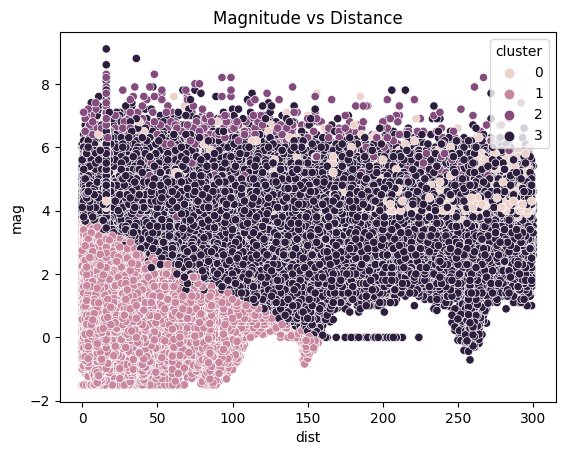

In [28]:
sns.scatterplot(x = data['dist'], y = data['mag'], hue = data['cluster'], legend ='full')
plt.title('Magnitude vs Distance')
plt.show()

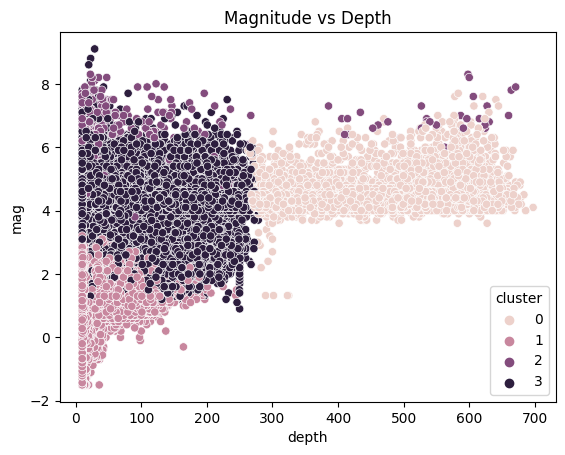

In [29]:
sns.scatterplot(x = data['depth'], y = data['mag'], hue = data['cluster'], legend ='full')
plt.title('Magnitude vs Depth')
plt.show()

c:\Users\FedeGP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


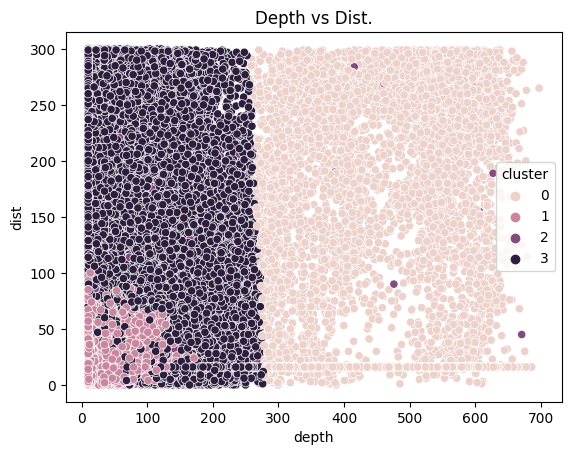

In [32]:
sns.scatterplot(x = data['depth'], y = data['dist'], hue = data['cluster'], legend ='full')
plt.title('Depth vs Dist.')
plt.show()

In [35]:
signif = data[data['signif']==1]
tsun = data[data['tsunami']==1]

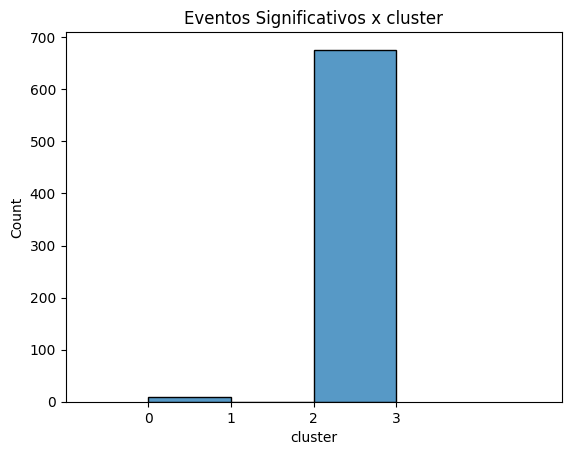

In [31]:
fig, ax = plt.subplots()
sns.histplot(x=signif['cluster'], binwidth=1)
ax.set_xlim(-1,5)
ax.set_xticks(range(0,4))
plt.title('Eventos Significativos x cluster')
plt.show()

In [40]:
data[data['cluster']==2]['id'].count()

1525

In [49]:
len(signif)

685

In [41]:
data['cluster'].value_counts()

1    1502834
3     349841
0      13715
2       1525
Name: cluster, dtype: int64

In [48]:
data[data['cluster']==2][['mag','depth','dist']].describe()

,mag,depth,dist
count,1525.000000,1525.000000,1525.000000
mean,5.292374,47.970738,77.070820
std,1.087994,83.478040,74.035098
min,1.800000,10.000000,0.000000
25%,4.330000,10.000000,16.000000
50%,5.100000,20.000000,53.000000
75%,6.300000,45.500000,106.000000
max,8.300000,670.810000,295.000000
